In [1]:
import flipflopinertial as ffi
import flipflopanalytical as ff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
from scipy.special import erfc
from scipy.integrate import simps # used for normalization of simulated pdfs


# set up a custom colormap
from matplotlib.colors import LinearSegmentedColormap
cm_data = np.loadtxt("batlow.txt")
batlow = LinearSegmentedColormap.from_list('batlow', cm_data)
x = np.linspace(0,1,25)
np.random.shuffle(x)
import cycler
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color',batlow(x))
x = np.array([0.0, 0.25, 0.5, 0.6,0.7])
colors = batlow(x)
c5,c4,c3,c2,c1=colors
colarr = [c1,c2,c4,c5]


# set the latex font
#plt.rcParams.update({
#    "text.usetex": True,})
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# define Peclet number notation
preamble = r"\newcommand\Pe{\mbox{\textit{Pe}}}"
plt.rc('text.latex', preamble=preamble)

# set up sequential colormap
cm_data = np.loadtxt("batlow_seq.txt")
batlow = LinearSegmentedColormap.from_list(batlow, cm_data)

(0.009065, 0.104487, 0.350933, 1.0)

In [22]:
np.array(batlow(0.9))*255

array([252.859785, 184.81227 , 194.299545, 255.      ])

[ 10.  42.  92. 255.]


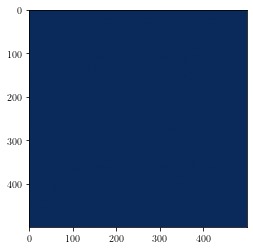

In [30]:
im = np.ones((500,500,4))*np.array(batlow(0.9))[None,None,:]

im = np.ones((500,500,4))*c5[None,None,:]
print(255*im[0,0])
plt.imshow(im)

# now comes the hard part...
This figure shows the scale dependence of the flux rate function $\Lambda(t)$ in one panel. It shows the scale dependence of the pdf distribution $F(q|T)$ in another panel.

### First find the parameters to simulate using the analytical formula

/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))


(0.8, 100.0)

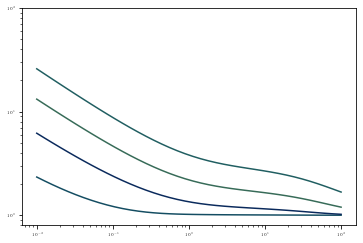

In [171]:
# simulate the flux for 4 different conditions.
# these are the common parameters shared by all simulations.
adaptive = (1) # set up the adaptive timestep.
tmax = 1e2 # max simulatoin time
T = np.geomspace(1e-2, tmax, 40)
Np = 150000 # number of particles in each system to be simulated
kd = 1
ke = 0.05*kd # scale entrainment to deposition rate
gam = 1/(0.01/kd) # relaxation time - 1/20 the motion time
V = 0.1 # velocity.
stop=True # the simulation stops for x far enough beyond x=0.

# these are the specific parameters to each of the 4 flux simulations
Pe = [5,0.5,0.1,0.025] # array of peclet numbers to simulate
# Pe = V^2/(2 kd D).
D = [V**2/2/kd/pe for pe in Pe] # array of velocities to simulate
L = [3*max(np.sqrt(2*d*tmax), ke*V/(ke+kd)) for d in D] # array of domain sizes to simulate
Gam = [d*gam**2 for d in D]
# these domaifn sizes are set as 3x the maximum expected travel distance of a particle over the simulation time.


dt = min(1/kd,1/ke,1/gam)/35 # 35 times smaller than any other timescale

for Li,Gam_i in zip(L,Gam):
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]
    plt.loglog(T*kd,ff.Q(T,params)/ffi.Q0(params))
    
plt.ylim(8e-1,1e2)

## Now do the simulation of the inertial model

In [ ]:
Nsystems = 50
i = 0
for Li,Gam_i in zip(L,Gam):
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]
    q = ffi.parallel(params,Nsystems)
    np.save('sim_%d'%i,q)
    print('sim {} finished.'.format(i))
    print(':::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    i+=1

# visualize numerical simulations against analytical results

/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))


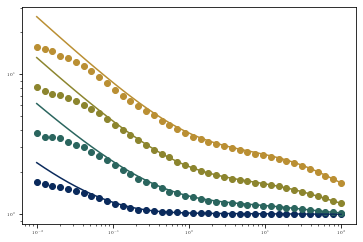

In [48]:
i=0

for Li,Gam_i in zip(L,Gam):
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]
    # unfortunately it is too expensive to simulate the remaining points here
    
    # numerical
    
    plt.loglog(T,ff.Q(T,params)/ffi.Q0(params),color=colors[i])
    # analytical
    q = np.load('sim_%d.npy'%i)
    q = q.mean(0)/T/ffi.Q0(params)/ffi.rho(params) # scale
    plt.scatter(T,q,color=colors[i]) # plot
    i+=1
    
# these simulations are very tricky.
# when the flux drops off at long timecales, that means L is too short.
# when the flux overshoots at short timescales, that means dt is too large
# when the flux is a straight line at short timescales, not tangent to the analytical result,
        # that means Np is too small (it represents a single particle crossing instead of many.)
# when the flux overshoots at large T for low Pe simulations it means
        # that the "stop" distance is too close to x=0.

# temporary.. extend the range of the results to what it will eventually be when these long simulations finish

/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))


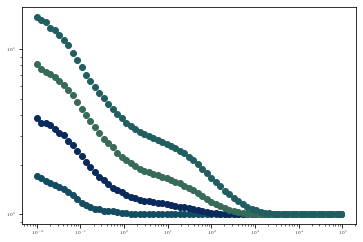

In [172]:
T0 = T
T1 = T*10000
T1 = T1[T1>T0.max()]
Ts = np.hstack((T0,T1))
Ts = Ts[Ts<=1e5]
i=0
for Li,Gam_i in zip(L,Gam):
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]
    # analytial
    qa = ff.Q(Ts,params)/ffi.Q0(params)
    # numerical
    qn = np.load('sim_%d.npy'%i)
    qn = qn.mean(0)/T/ffi.Q0(params)/ffi.rho(params)
    o = np.empty_like(Ts)
    
    n = len(qn)-15
    
    o[:n]=qn[:n]
    o[n:]=qa[n:]
    plt.loglog(Ts,o,'o')
    np.save('sim_%d_ext.npy'%i,o)
    i+=1


# final figure
shows the flux rate function scaling downward.. both numerical and analytical

/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))


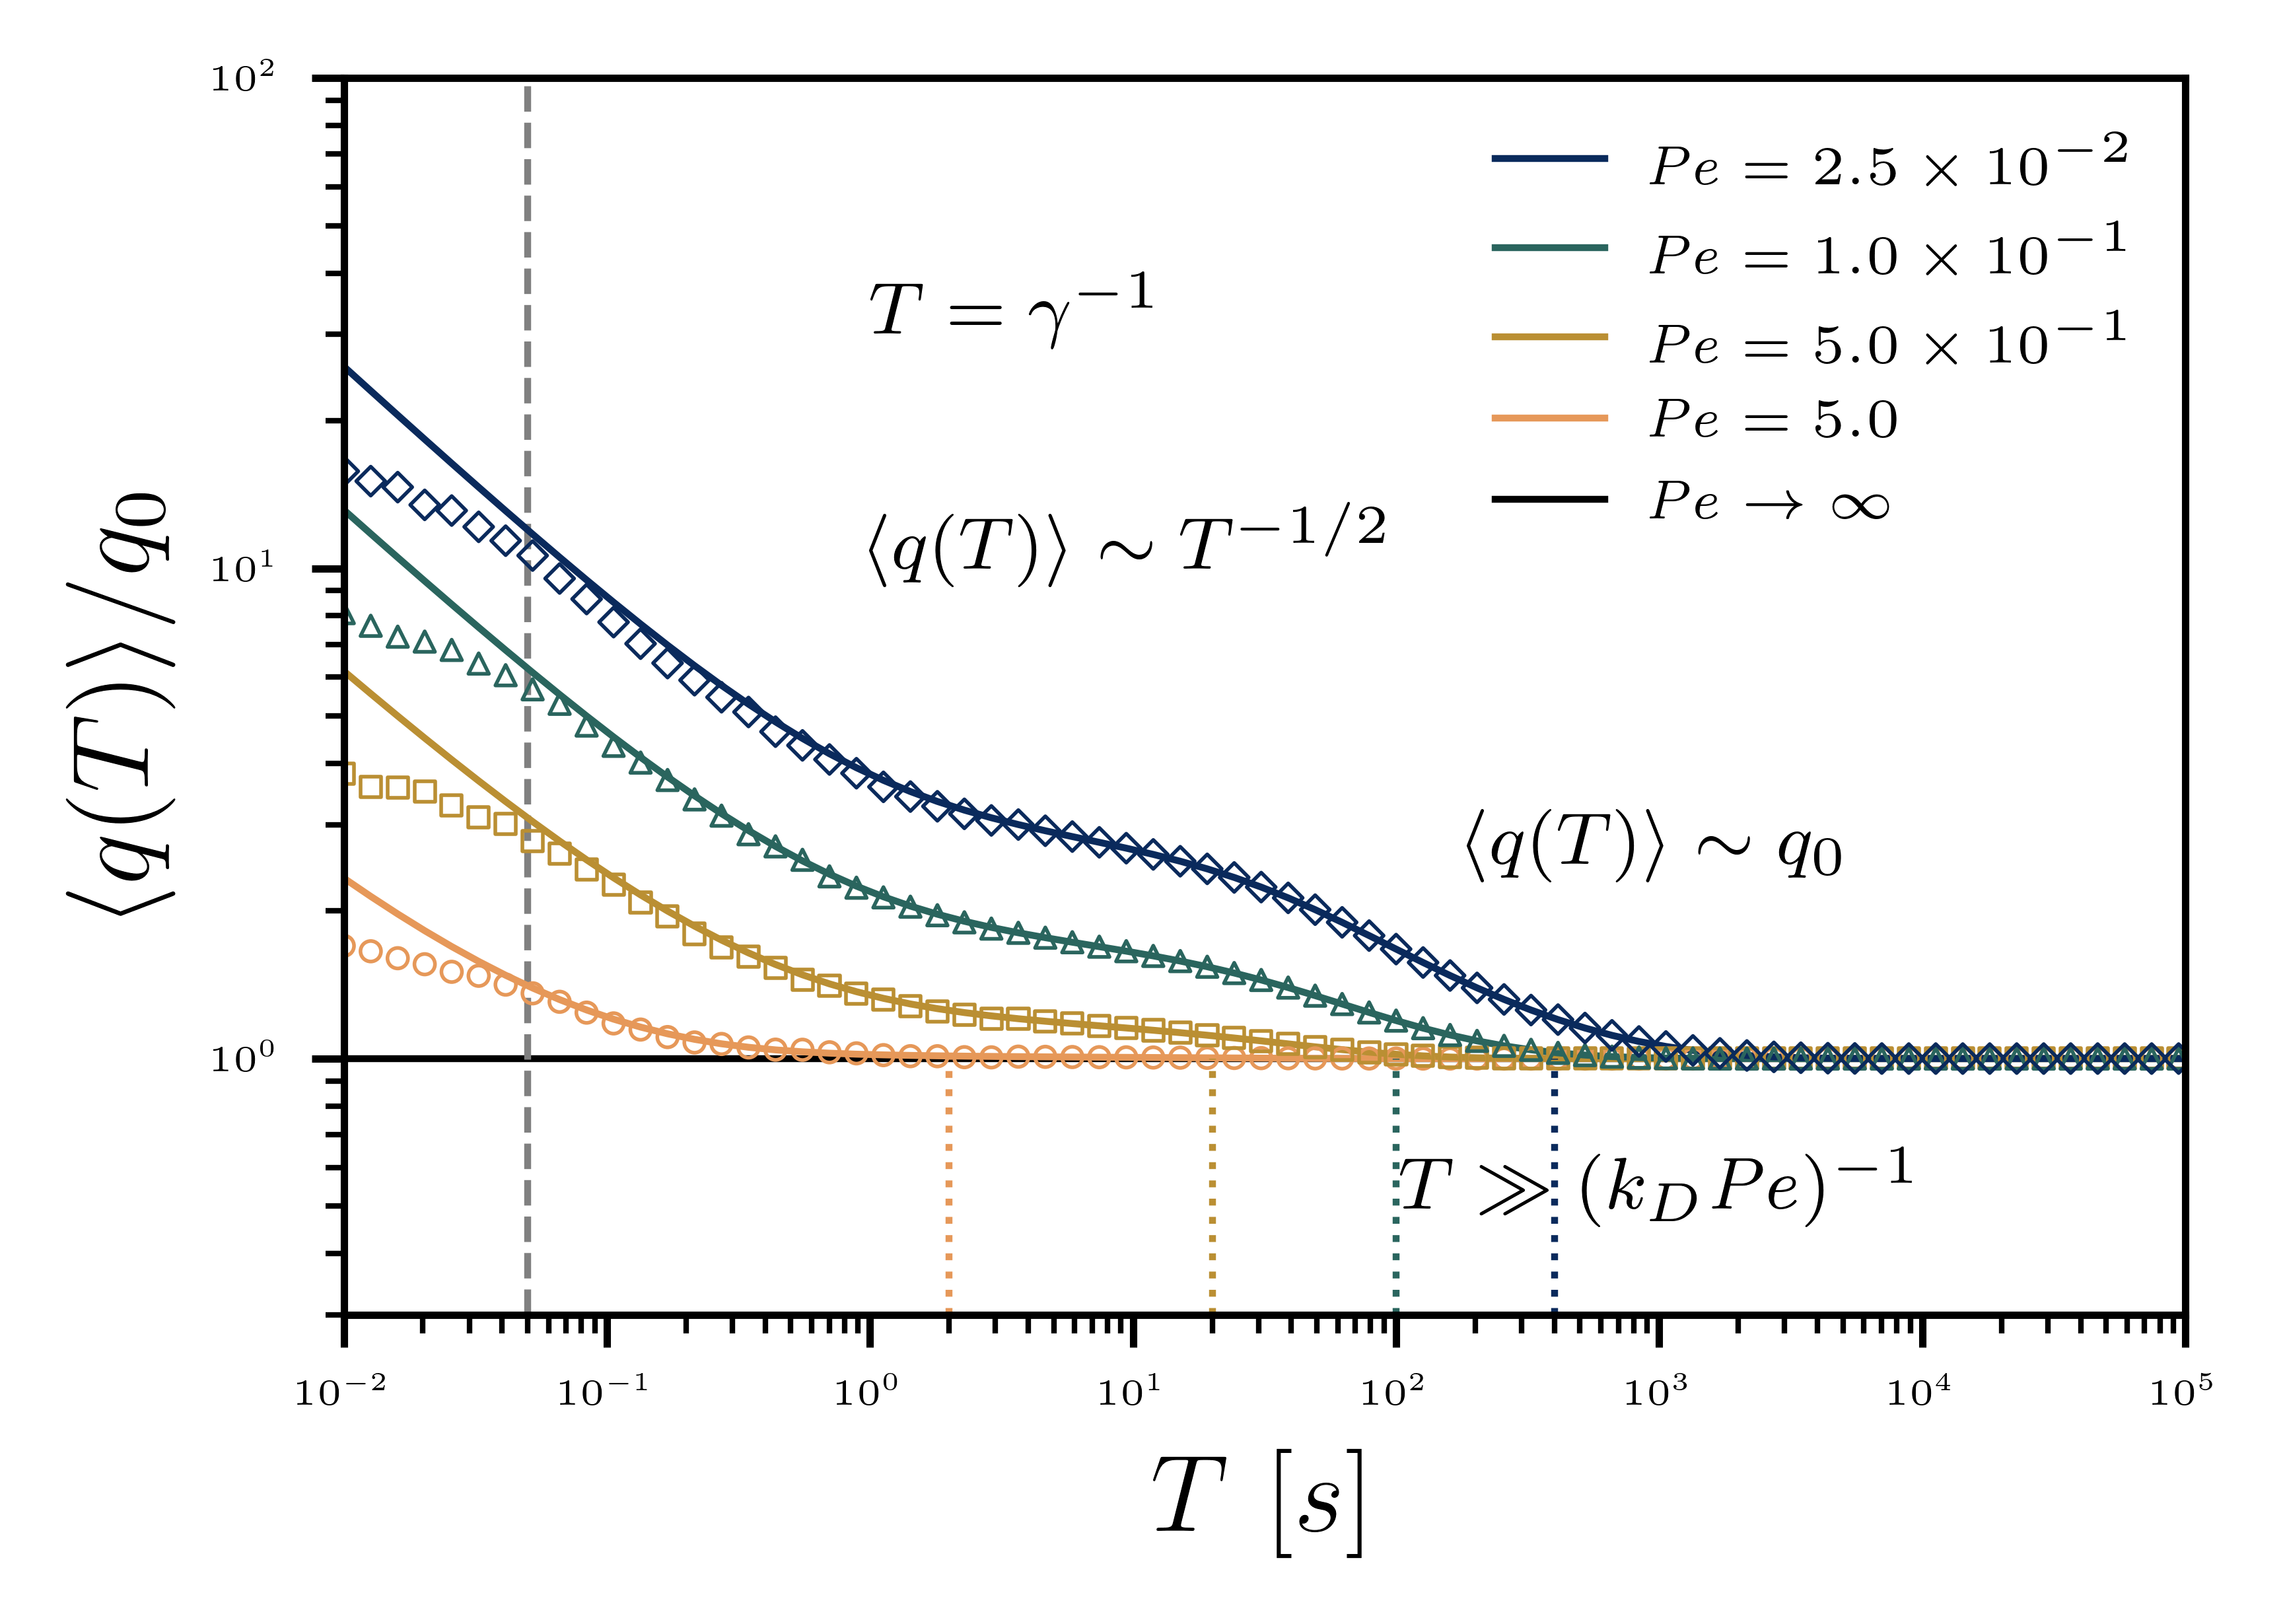

In [272]:
xsmol = 4
smol = 6 # the font sizes
med = 8
lar = 12
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=lar)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)


# initialize the figure
h = 2.5  # height
w = 3.5  # width

fig, ax = plt.subplots(1,1,figsize=(w,h),dpi=1000,tight_layout=True)


markers=['o','s','^','D']
labels=[r"$\Pe = 5.0$", r"$\Pe = 5.0 \times 10^{-1}$", r"$\Pe =  1.0 \times 10^{-1}$", r"$\Pe = 2.5 \times 10^{-2}$"]
i=0
for Li,Gam_i in zip(L,Gam):
    # get parameters
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]   
    # plot the numerical result
    # switch this back to T
    ax.loglog(Ts,ff.Q(Ts,params)/ffi.Q0(params),color=colarr[i],label=labels[i],lw=0.75,zorder=0)
    # plot the analytical result
    q = np.load('sim_%d_ext.npy'%i)
    #q = q.mean(0)/T/ffi.Q0(params)/ffi.rho(params) # scale
    ax.scatter(Ts,q,edgecolor=colarr[i],facecolor='None',s=5,lw=0.4,marker=markers[i],zorder=1) # plot
    
    Pe = V**2*gam**2/(2*Gam_i*kd)
    # vertical annotation of the convergence time
    tc = 10/Pe/kd
    ax.plot([tc,tc],[3e-1,1],linestyle=':',lw=0.75,color=colarr[i])
    
    i+=1
    
ax.axhline(1,color='black',lw=0.75,zorder=-1,label=r"$\Pe\rightarrow\infty$")
ax.axvline(5/gam,color='grey',lw=0.75,linestyle='--',zorder=-1)
ax.legend(fontsize=smol,frameon=False)

ax.set_ylabel(r"$\langle q(T) \rangle/q_0$",fontsize=lar)
ax.set_xlabel(r"$T$ $[s]$",rotation,fontsize=lar)



ax.set_xlim(1e-2,1e5)
ax.set_ylim(3e-1,1e2)



# add in text to be moved...
cx = 1e1
cy = 1e1
ax.text(cx,cy,r"$\langle q(T)\rangle \sim T^{-1/2}$",fontsize=med,ha='center')
cx = 1e3
cy = 2.5
ax.text(cx,cy,r"$\langle q(T) \rangle \sim q_0$",fontsize=med,ha='center')


cx = 1e3
cy = np.sqrt(3e-1*1)
s = r"$T \gg (k_D \Pe)^{-1}$"
ax.text(cx,cy,s,fontsize=med,ha='center',va='center')


# re order the legend

handles, labels = ax.get_legend_handles_labels()
order = (3,2,1,0,4)
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax.legend(handles, labels,fontsize=6,frameon=False)



ax.text(1,30,r"$T = \gamma^{-1}$",fontsize=med)


plt.show()


#fig.savefig('../figures/figure3.pdf', dpi=1000, tight_layout=True)


# flux distribution plot

$$ F(q|T) = \sum_{n=0}^\infty \frac{\Lambda(T)^n}{\Gamma(n+1)}e^{-\Lambda(T)}\delta(n-q/T).$$

# set up a 2 panel gridspec to put the flux plot in

/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
/home/kp/Desktop/flipflop/code/flipflopanalytical.py:103: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  K = lambda tt: quad(lambda u,t: I1(u,t)+I2(u,t),0,tt,args=(tt))
<ipython-input-277-e09166d85ef0>:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('/home/kp/Desktop/flipflop/figures/figure4.pdf',dpi=1000)
<ipython-input-277-e09166d85ef0>:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('/home

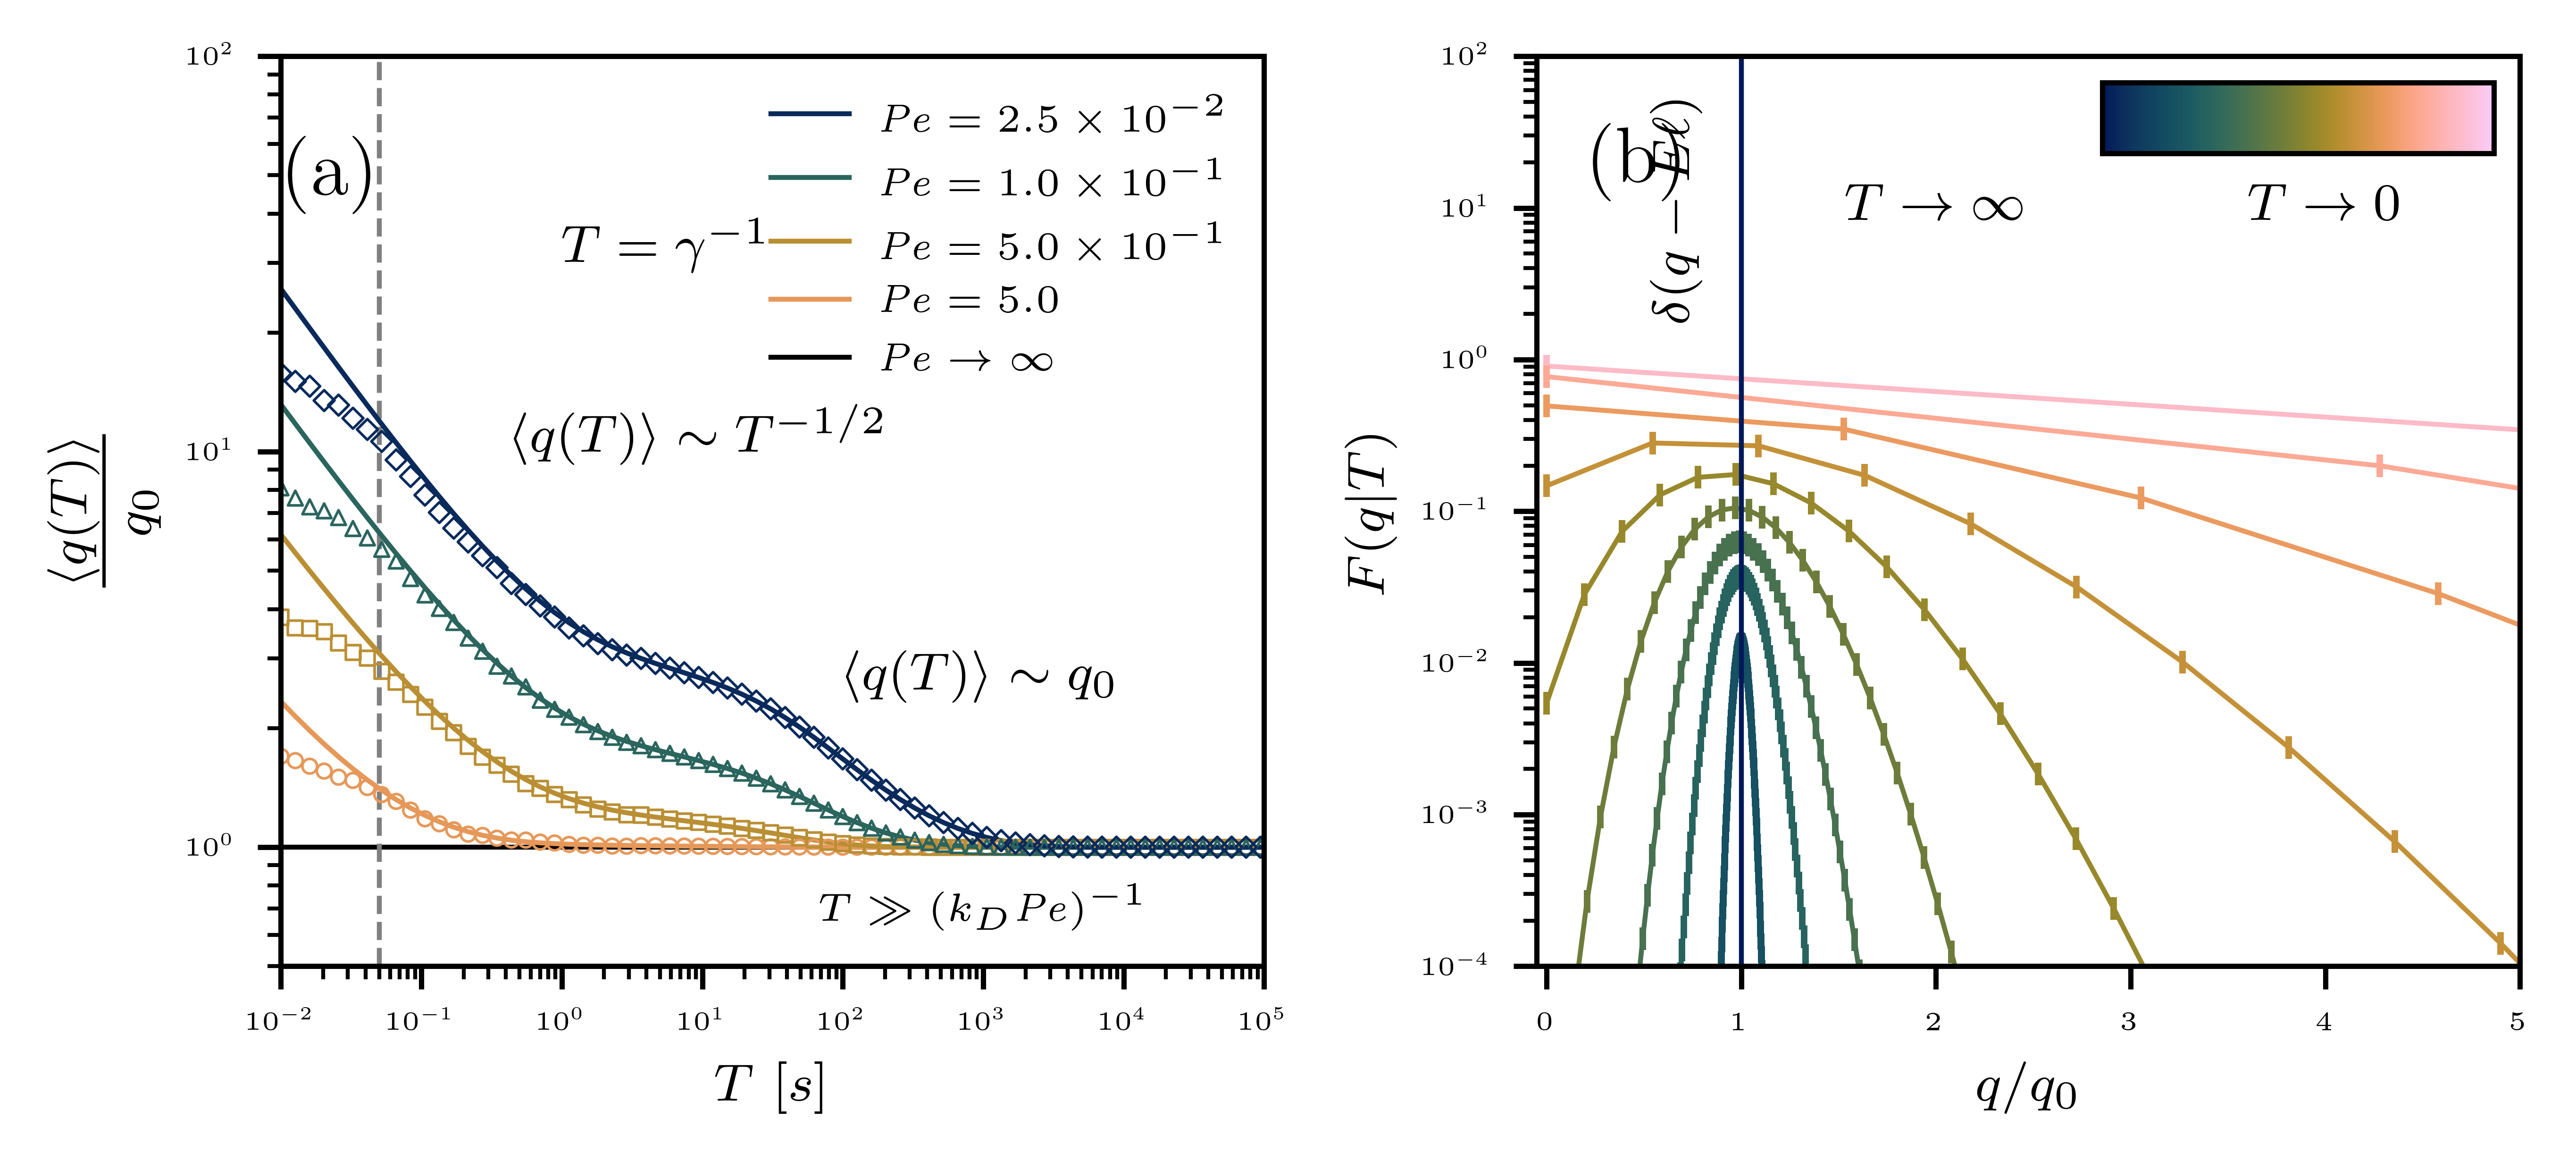

In [277]:
w = 5.5
h = 2.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(w,h),dpi=1000,tight_layout=True)

## BUILD THE LEFT PANEL 


markers=['o','s','^','D']
labels=[r"$\Pe = 5.0$", r"$\Pe = 5.0 \times 10^{-1}$", r"$\Pe =  1.0 \times 10^{-1}$", r"$\Pe = 2.5 \times 10^{-2}$"]
i=0
for Li,Gam_i in zip(L,Gam):
    # get parameters
    params = [ke,kd,gam,Gam_i,V,T,Np,Li,dt,stop,adaptive]   
    # plot the numerical result
    # switch this back to T
    ax1.loglog(Ts,ff.Q(Ts,params)/ffi.Q0(params),color=colarr[i],label=labels[i],lw=0.75,zorder=0)
    # plot the analytical result
    q = np.load('sim_%d_ext.npy'%i)
    #q = q.mean(0)/T/ffi.Q0(params)/ffi.rho(params) # scale
    ax1.scatter(Ts,q,edgecolor=colarr[i],facecolor='None',s=5,lw=0.4,marker=markers[i],zorder=1) # plot
    
    #Pe = V**2*gam**2/(2*Gam_i*kd)
    # vertical annotation of the convergence time
    #tc = 10/Pe/kd
    #ax1.plot([tc,tc],[3e-1,1],linestyle=':',lw=0.75,color=colarr[i])
    
    i+=1
    
ax1.axhline(1,color='black',lw=0.75,zorder=-1,label=r"$\Pe\rightarrow\infty$")
ax1.axvline(5/gam,color='grey',lw=0.75,linestyle='--',zorder=-1)
ax1.legend(fontsize=xsmol,frameon=False)

ax1.set_ylabel(r"$\frac{\langle q(T) \rangle}{q_0}$",fontsize=lar)
ax1.set_xlabel(r"$T$ $[s]$",fontsize=med)



ax1.set_xlim(1e-2,1e5)
ax1.set_ylim(5e-1,1e2)



# add in text to be moved...
cx = 1e1
cy = 1e1
ax1.text(cx,cy,r"$\langle q(T)\rangle \sim T^{-1/2}$",fontsize=med,ha='center')
cx = 1e3
cy = 2.5
ax1.text(cx,cy,r"$\langle q(T) \rangle \sim q_0$",fontsize=med,ha='center')


cx = 1e3
cy = np.sqrt(5e-1*1)
s = r"$T \gg (k_D \Pe)^{-1}$"
ax1.text(cx,cy,s,fontsize=smol,ha='center',va='center')


# re order the legend

handles, labels = ax1.get_legend_handles_labels()
order = (3,2,1,0,4)
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
ax1.legend(handles, labels,fontsize=6,frameon=False)



ax1.text(1,30,r"$T = \gamma^{-1}$",fontsize=med)


###################################### END LEFT PANEL


# BUILD THE RIGHT PANEL
# set up the axis labels
ax2.set_xlabel(r'$q/q_0$',fontsize=med)
ax2.set_ylabel(r'$F(q|T)$',fontsize=med)


# set up parameters...
def newparams():
    # just u
    adaptive = (1) # set up the adaptive timestep.
    tmax = 1e2 # max simulatoin time
    T = np.geomspace(1e-2, tmax, 40)
    Np = 50 # number of particles in each system to be simulated
    kd = 2
    ke = 0.05*kd # scale entrainment to deposition rate
    gam = 1/(0.01/kd) # relaxation time - 1/20 the motion time
    V = 0.1 # velocity.
    stop=True # the simulation stops for x far enough beyond x=0.

    # these are the specific parameters to each of the 4 flux simulations
    Pe = 1 # array of peclet numbers to simulate
    D = V**2/2/kd/Pe # array of velocities to simulate
    L = 3*ke*V*tmax/(ke+kd) # array of domain sizes to simulate
    Gam = D*gam**2
    # these domaifn sizes are set as 3x the maximum expected travel distance of a particle over the simulation time.
    #ke,kd,gam,Gam,V,T,Np,L,dt,stop,adaptive
    q0 = Np/L*ke*V/(ke+kd)
    return [ke,kd,gam,Gam,V,T,Np,L,dt,stop,adaptive], q0
params_new,q0_new = newparams()

# make the plot 

#q0 = Np/L*ke*V/(ke+kd)
tarr = np.geomspace(0.5,15000,11)
mask = np.arange(len(tarr))!=10
mask = mask&(np.arange(len(tarr))!=8)
tarr = tarr[mask]
for i,t in enumerate(tarr):
    q,p = ff.Fvers(t,params_new)
    
    N = len(tarr)+2
    x = 1-1/N - i*(1/N) # this approches 1 at first iteration and 0 at the last.
    c = batlow( x ) # but it does not achieve either extreme.
    ax2.semilogy(q/q0,p,marker='|',color=c,markersize=3.5,lw=0.75,zorder=0)


ax2.set_xlim(-0.05,5)
ax2.set_ylim(1e-4,100)
ax2.axvline(1,color=batlow(0.0),zorder=1,lw=0.75) # here an extreme is achieved...
#ax2.axhline(1,color=batlow(1.0),zorder=-1,lw=0.75) # and here another is achieved..

# add in the delta function annotation
ax2.text(0.8,1e1,r"$\delta(q-E\ell)$",rotation=90,fontsize=med,ha='right',va='center')

# add in an inset plot for the colorbar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # add an inset axis for the colorbar
axins = inset_axes(ax2, width=0.83,height=0.15, loc='upper right') # put it in the upper right

    
# set up the colorbar
cmap = batlow
norm = mpl.colors.Normalize(vmin=1, vmax=0)
cb = mpl.colorbar.ColorbarBase(axins, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
# remove ticks from the colorbar
#axins.axes.yaxis.set_ticklabels([]) # remove all of the ticks
#axins.axes.xaxis.set_ticklabels([])
cb.set_ticks([])
#axins.axes.yaxis.set_ticklabels([])

#for edge in ['top','right','bottom','left']: # turn off the frame of the inset
#    axins.spines[edge].set_visible(False)
ax2.text(4,1e1,r"$T \rightarrow 0$",fontsize=med,ha='center',va='center')
ax2.text(2,1e1,r"$T\rightarrow \infty$",fontsize=med,ha='center',va='center')


# add panel annotations...
x,y = 2.5e-2,5e1
ax1.text(x,y,"(a)",fontsize=lar,ha='center',va='center')
x,y = 0.5,2e1
ax2.text(x,y,"(b)",fontsize=lar,ha='center',va='center')
plt.savefig('/home/kp/Desktop/flipflop/figures/figure4.pdf',dpi=1000)
plt.show()

 nightmare.... lots of work in inkscape coming up...

In [201]:

    #loc='upper right',
    #bbox_to_anchor=None,
    #bbox_transform=None,
    #axes_class=None,
    #axes_kwargs=None,
    #borderpad=0.5,


im = axins.imshow(Z, extent=extent, origin="lower")



# colorbar
cax = inset_axes(axins,
                 width="5%",  # width = 10% of parent_bbox width
                 height="100%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins.transAxes,
                 borderpad=0,
                 )
fig.colorbar(im, cax=cax)

<ipython-input-201-63450a75ad58>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition)


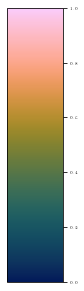

In [199]:
fig, ax = plt.subplots(figsize=(1,10))
fig.subplots_adjust(bottom=0.5)

cmap = batlow
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

# learning to make the distribution plot

In [61]:
adaptive = (1) # set up the adaptive timestep.
tmax = 1e2 # max simulatoin time
T = np.geomspace(1e-2, tmax, 40)
Np = 50 # number of particles in each system to be simulated
kd = 2
ke = 0.05*kd # scale entrainment to deposition rate
gam = 1/(0.01/kd) # relaxation time - 1/20 the motion time
V = 0.1 # velocity.
stop=True # the simulation stops for x far enough beyond x=0.

# these are the specific parameters to each of the 4 flux simulations
Pe = 1 # array of peclet numbers to simulate
D = V**2/2/kd/Pe # array of velocities to simulate
L = 3*ke*V*tmax/(ke+kd) # array of domain sizes to simulate
Gam = D*gam**2
# these domaifn sizes are set as 3x the maximum expected travel distance of a particle over the simulation time.

params = [ke,kd,gam,Gam,V,T,Np,L,dt,stop,adaptive]

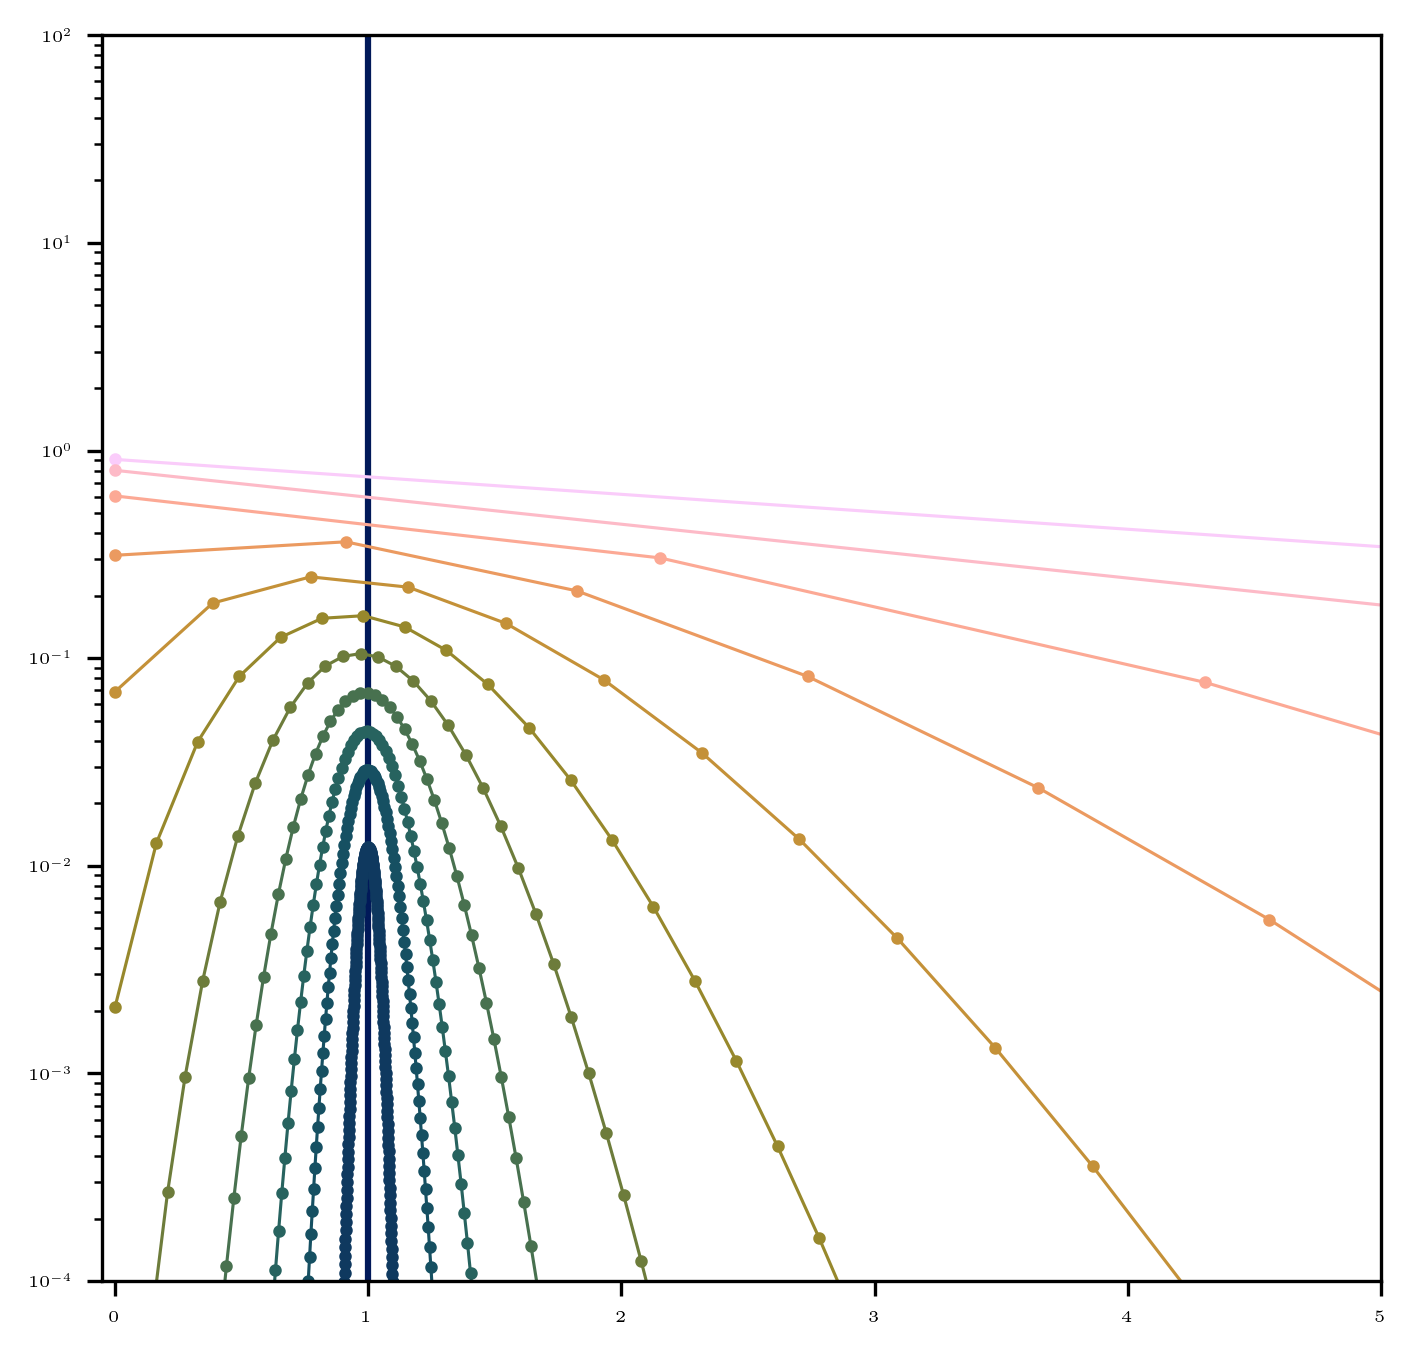

In [166]:
cmap = plt.get_cmap('summer')

w=5.5
h=5.5
fig = plt.figure(figsize=(w,h),dpi=300)
ax = plt.gca()

q0 = Np/L*ke*V/(ke+kd)
i = 0
tarr = np.geomspace(0.5,15000,13)
mask = np.arange(len(tarr))!=12
mask = mask&(np.arange(len(tarr))!=10)
tarr = tarr[mask]
for t in tarr:
    q,p = ff.Fvers(t,params)
    c = batlow(1-i/len(tarr))
    ax.semilogy(q/q0,p,marker='o',color=c,markersize=2,lw=0.75)
    i+=1


ax.set_xlim(-0.05,5)
ax.set_ylim(1e-4,100)
ax.axvline(1,color=batlow(0.0),zorder=-1)
